
## Autism spectrum disorder

**Abstract:**
Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

## Road Map:

* [Step 0](#step0): Import Datasets.

* [Step 1](#step1): Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

* [Step 2](#step2): A quick visualization with *Seaborn*.

* [Step 3](#step3): At First, I applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

* [Step 4](#step4): Next, I experimented with different topologies, optimizers, and hyperparameters for different models.

* [Step 5](#step7): Then I built a Multi-Layer Perceptron and train it to classify indivisual with ASD based on its features.

* [Step 6](#step8): Conclusion.

## Let's begin with preparing our data set.

---
<a id='step0'></a>
## Step 0: Import Datasets

 I start by importing the 'asv.csv' file into a Pandas dataframe and take a look at it.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('ASD.csv')
display(data.head(n=5))

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [127]:
# Total number of records
n_records = len(data.index)

# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records: {}".format(n_records))

Total number of records: 800


** Featureset Exploration **

This data contains 704 instances, and contains the following attributes:
* **age**: *number* (Age in years).
* **gendar**: *String* [Male/Female].
* **ethnicity**: *String* (List of common ethnicities in text format).
* **Born with jaundice**: *Boolean* [yes or no].
* **Family member with PDD**: *Boolean* [yes or no].
* **Who is completing the test**: *String* [Parent, self, caregiver, medical staff, clinician ,etc.].
* **Country of residence **: *String* (List of countries in text format).
* **Used the screening app before **: *Boolean* [yes or no] (Whether the user has used a screening app)
* **Screening Method Type**: *Integer* [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).
* **Question 1-10 Answer**: *Binary* [0, 1] (The answer code of the question based on the screening method used).
* **Screening Score**: *Integer* (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as **preprocessing**. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [3]:
asd_data = pd.read_csv('ASD.csv', na_values=['?'])
asd_data.head(n=5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,NaN,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,South Africa,no,-4.777286,18 and more,Self,0


Here I evaluate whether the data needs cleaning; your model is only as good as the data it's given.

In [4]:
asd_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


There are quite a few missing values in the data set. Before I just drop every row that's missing data, I make sure not to bias the data in any way. In other words we need to make sure that there does not appear to be any sort of correlation to what sort of data has missing fields. If there were, I'd have to try and go back and fill that data in.

---
<a id='step1'></a>
## Step 1: Clean Datasets

In [5]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull())
|(asd_data['jaundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,NaN,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,India,no,2.255185,18 and more,Self,0
3,4,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,South Africa,no,-4.777286,18 and more,Self,0
10,11,1,1,1,1,1,1,1,0,1,...,f,NaN,no,no,Canada,no,13.839255,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,793,1,0,0,0,0,0,0,0,0,...,m,NaN,no,no,Bolivia,no,9.403804,18 and more,Self,0
793,794,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,United Kingdom,no,9.777375,18 and more,Self,0
794,795,0,1,0,0,1,0,0,1,0,...,m,NaN,no,no,India,no,9.592719,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,Canada,no,9.069342,18 and more,Self,0


Since the missing data seems randomly distributed, I go ahead and drop rows with missing data.

In [6]:
asd_data.dropna(inplace=True)
asd_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,392.558511,0.652482,0.613475,0.540780,0.517730,0.485816,0.391844,0.485816,0.572695,0.597518,0.691489,28.746741,9.273158,0.271277
std,228.257128,0.476605,0.487385,0.498777,0.500129,0.500242,0.488595,0.500242,0.495126,0.490833,0.462289,16.454732,4.647231,0.445013
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200405,-6.137748,0.000000
25%,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.216827,6.378118,0.000000
50%,393.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.245655,10.691040,0.000000
75%,582.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.187308,12.947958,1.000000
max,798.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.978179,15.853126,1.000000


Let's check out the data types of all our features including the target feature. Moreover, lets count the total number of instances and the target-class distribution.

In [126]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print ("Total number of records: {}".format(n_records))

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object
Total number of records: 564


---
<a id='step2'></a>

## Step 2: A quick visualization with *Seaborn*

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

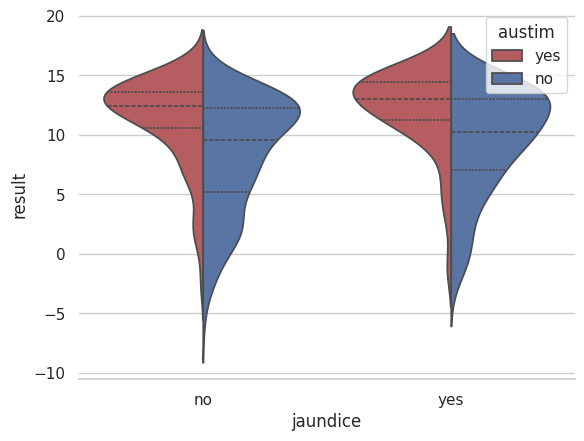

In [9]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jaundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

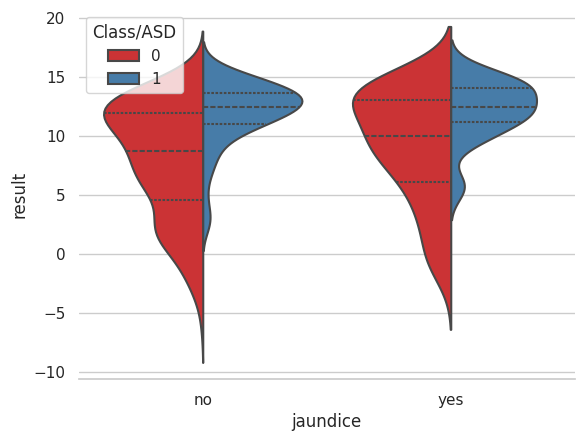

In [10]:
import seaborn as sns

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jaundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette='Set1',linewidth=1.5)
sns.despine(left=True)

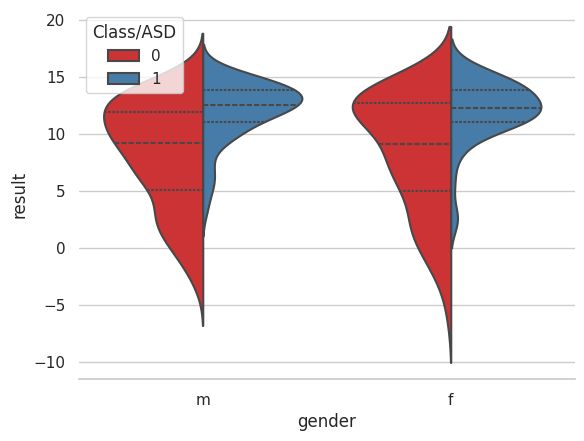

In [11]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette='Set1',linewidth=1.5)
sns.despine(left=True)

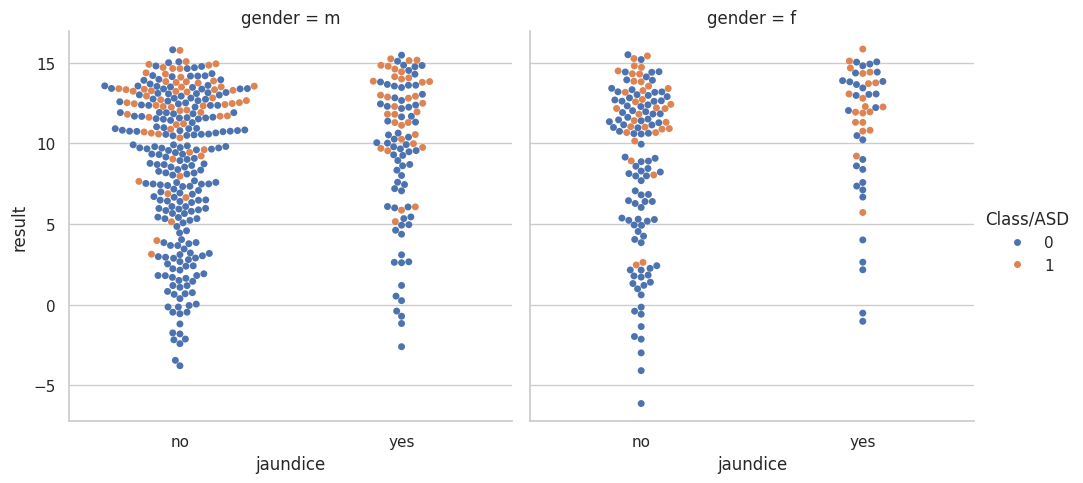

In [12]:
# sns.factorplot(x="jaundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");

sns.catplot(x="jaundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm")

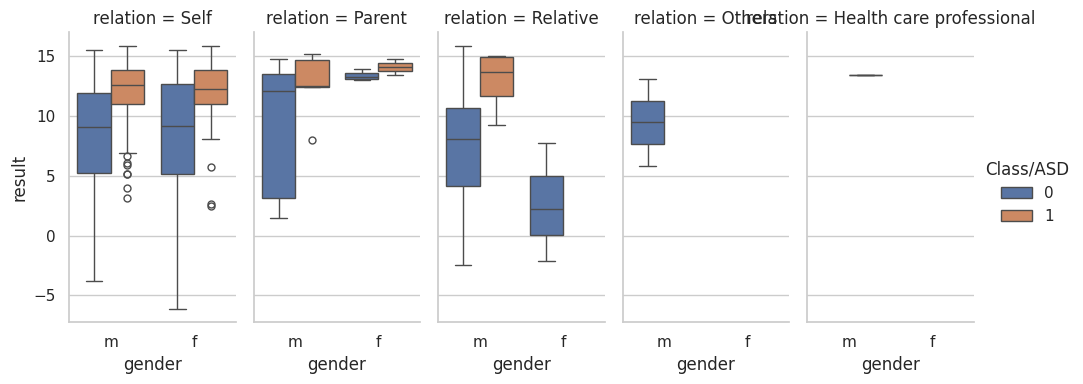

In [13]:
# sns.factorplot(x="gender", y="result", hue="Class/ASD",
#                col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

sns.catplot(x="gender", y="result", hue="Class/ASD",
            col="relation", data=asd_data, kind="box", height=4, aspect=.5)

<ipython-input-14-59080e19e1b6>:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  g = sns.catplot(x="result", y="jaundice", hue="gender", row="relation",


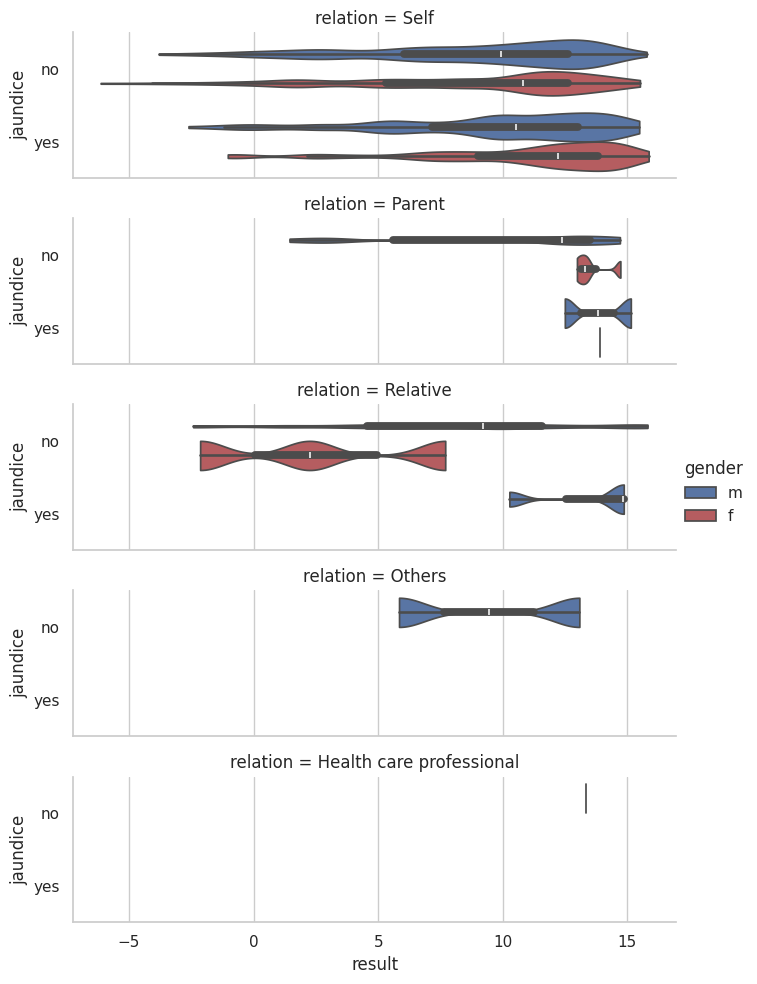

In [14]:
g = sns.catplot(x="result", y="jaundice", hue="gender", row="relation",
                data=asd_data, orient="h", height=2, aspect=3.5,
                palette={'f': "r", 'm': "b"}, kind="violin", dodge=True, cut=0, bw=.2)

In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used `factorplot` module from `seaborn` visualization software. In the first case, I used '`swamp`' kind of graph expressing the relationship between several different features present in the data whereas in the second case, '`box`' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

In [15]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Some of our models require the input data to be normalized, so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jaundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
2,0.051747,m,White-European,no,yes,United States,0.954452,Self,1,1,1,1,1,1,1,1,1,1
5,0.350685,m,Middle Eastern,no,no,Jordan,0.713926,Self,1,0,0,0,0,1,0,0,1,1
6,0.312308,f,Pasifika,no,no,United Kingdom,0.642190,Self,1,0,0,0,0,0,1,1,1,0
7,0.288249,m,Black,no,yes,United States,0.881077,Self,1,1,1,1,1,1,1,0,1,1
8,0.557122,m,White-European,no,no,Brazil,0.199263,Self,1,1,1,1,0,0,0,1,1,1


### One-Hot-Coding

From the table in **Clean Data Sets** above, we can see there are several features for each record that are non-numeric such as `Country_of_residence`, `ethnicity` etc. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, I need to convert the non-numeric target label, `'Class/ASD'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("YES" and "NO" to Class/ASD), I can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, I will implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_minmax_transform'` data.
 - Convert the target label `'asd_raw'` to numerical entries.
   - Set records with "NO" to `0` and records with "YES" to `1`.

In [17]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
2,0.051747,0.954452,1,1,1,1,1,1,1,1,...,False,False,False,True,False,False,False,False,False,True
5,0.350685,0.713926,1,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
6,0.312308,0.642190,1,0,0,0,0,0,1,1,...,False,False,True,False,False,False,False,False,False,True
7,0.288249,0.881077,1,1,1,1,1,1,1,0,...,False,False,False,True,False,False,False,False,False,True
8,0.557122,0.199263,1,1,1,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True


88 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jaundice_no', 'jaundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_China', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'contry_of_res_Egypt',

Text(0, 0.5, 'Frequency')

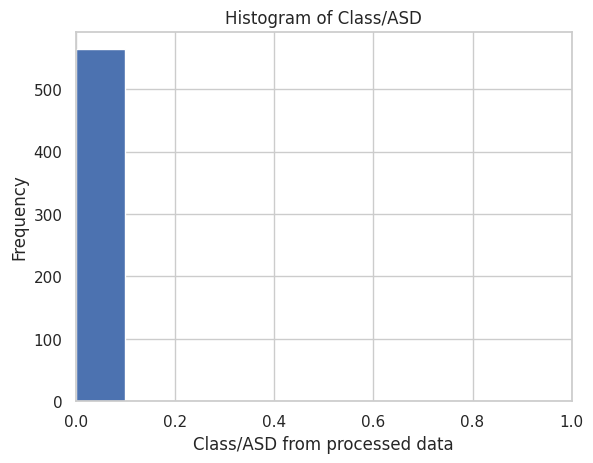

In [18]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [19]:
from sklearn.model_selection import train_test_split

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data)

# Split the data into features (X) and target variable (y)
X = encoded_data.drop("Class/ASD", axis=1)
y = encoded_data["Class/ASD"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---
<a id='step3'></a>

## Step 3: Models

###  Supervised Learning Models
**I have applied the following supervised learning models in this project which are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html).

[(1)](#1): Decision Trees

[(2)](#2) Random Forest

[(3)](#3) Support Vector Machines (SVM)

[(4)](#4) K-Nearest Neighbors (KNeighbors)

[(5)](#5) Naive Bayes (GaussianNB)

[(6)](#6) Logistic Regression

[(7)](#7) Multi Layer Perceptron (MLP)

---
<a id='1'></a>

##  (1) Decision Trees

I start with creating a DecisionTreeClassifier and fit it to the training data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifier
dt_clf.fit(X_train, y_train)

# Predictions
dt_pred = dt_clf.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       124
           1       0.68      0.53      0.59        36

    accuracy                           0.84       160
   macro avg       0.77      0.73      0.75       160
weighted avg       0.83      0.84      0.83       160



---------------
## Evaluating Model Performance

### Metrics
We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case where we have
- a total of 609 records with
- 180 individuals diagonised with ASD and
- 429 individuals not diagonised with ASD

accuracy by itself is not a very good metric.
Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Metrics computed from a confusion matrix

**Classification Accuracy**: Overall, how often is the classifier correct?

Confusion matrix, without normalization


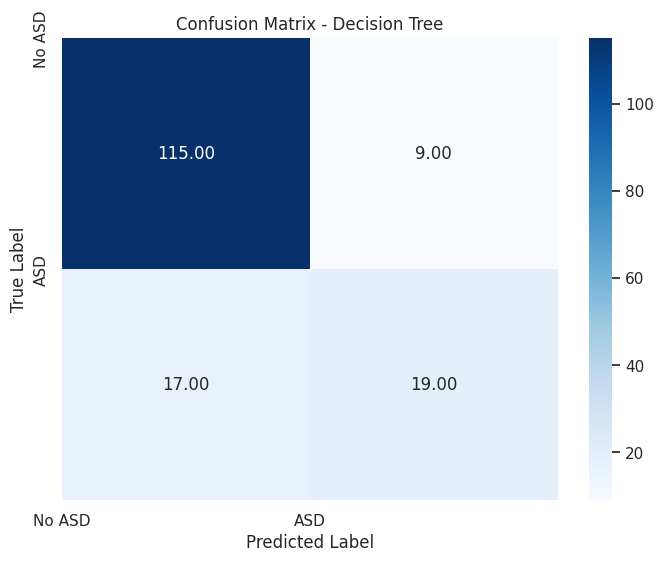

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='.2f')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=range(len(classes)), labels=classes)
    plt.yticks(ticks=range(len(classes)), labels=classes)
    plt.show()

# Plot confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(dt_cm, classes=["No ASD", "ASD"], normalize=False, title='Confusion Matrix - Decision Tree')


### Receiver Operating Characteristic (ROC) Curves

It would be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold? Lets plot the ROC curve.

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

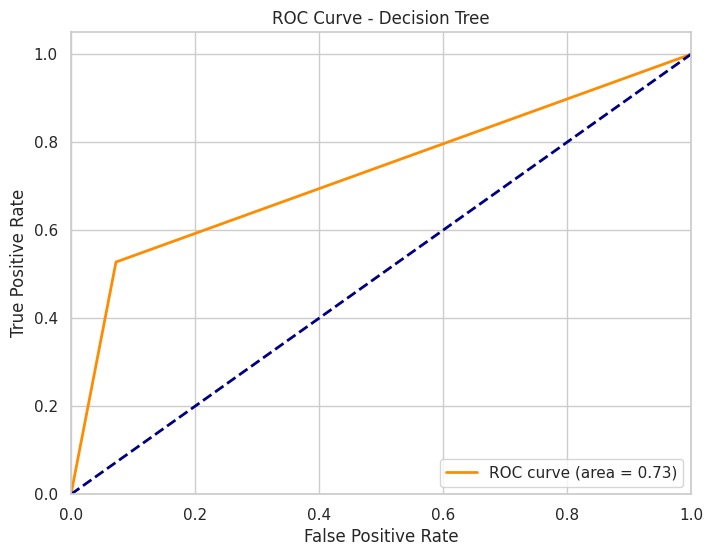

In [25]:
# Calculate ROC curve for Decision Tree
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_clf.predict_proba(X_test)[:, 1])
dt_auc = auc(dt_fpr, dt_tpr)
plot_roc_curve(dt_fpr, dt_tpr, dt_auc, 'Decision Tree')


### Cross-validation:

Now instead of a single train/test split, I use K-Fold cross validation to get a better measure of your model's accuracy (K=10).

### AUC Score:

AUC is the percentage of the ROC plot that is underneath the curve

In [26]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score for Decision Tree
dt_auc_score = roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:, 1])
print("AUC score for Decision Tree:", dt_auc_score)

AUC score for Decision Tree: 0.7275985663082437


### F-beta Score:

In [27]:
from sklearn.metrics import fbeta_score

# Define the beta value (e.g., 1 for F1 score, 0.5 for F0.5 score)
beta = 1  # You can adjust this value as needed

# Calculate F-beta score for Decision Tree
dt_fbeta = fbeta_score(y_test, dt_pred, beta=beta)
print("F-beta score for Decision Tree:", dt_fbeta)


F-beta score for Decision Tree: 0.5937499999999999


---
<a id='2'></a>
## (2) Random Forest

Now I apply a **RandomForestClassifier** instead to see whether it performs better.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
rf_clf = RandomForestClassifier(random_state=42)

# Train Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predictions
rf_pred = rf_clf.predict(X_test)

# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       124
           1       0.74      0.56      0.63        36

    accuracy                           0.86       160
   macro avg       0.81      0.75      0.77       160
weighted avg       0.85      0.86      0.85       160



Confusion matrix, without normalization


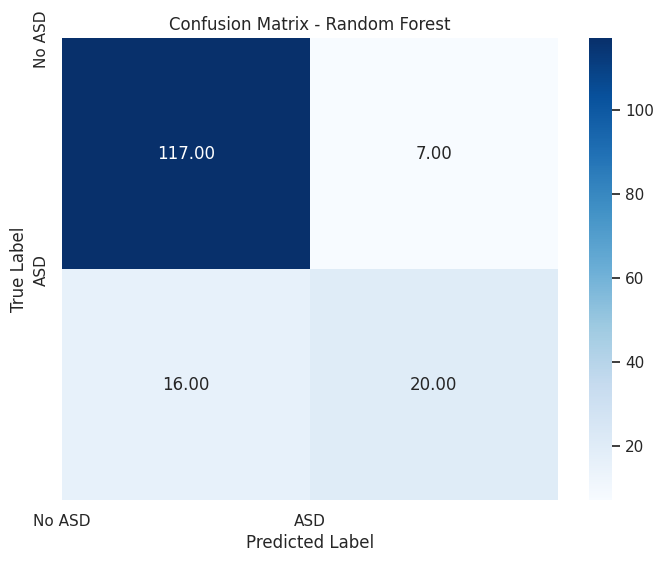

In [32]:
# Plot confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(rf_cm, classes=["No ASD", "ASD"], normalize=False, title='Confusion Matrix - Random Forest')

# ROC Curve

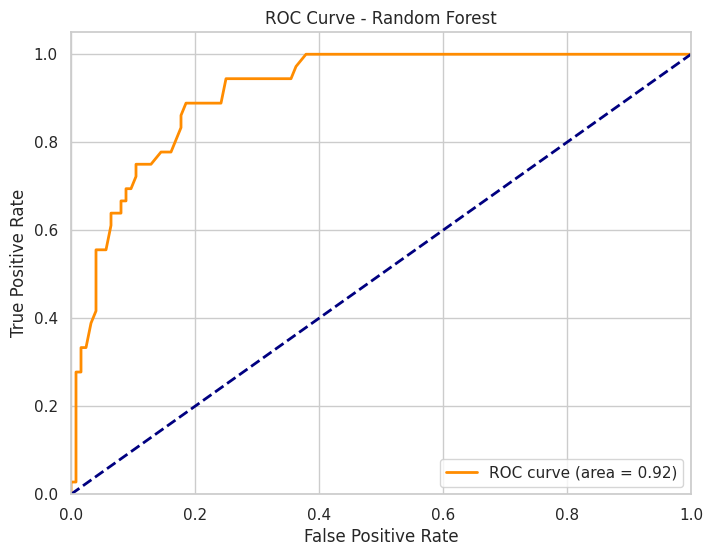

In [33]:
# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_auc, 'Random Forest')


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [34]:
# Calculate AUC score for Random Forest
rf_auc_score = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print("AUC score for Random Forest:", rf_auc_score)

AUC score for Random Forest: 0.9162186379928315


F-beta Score:

In [35]:
# Calculate F-beta score for Random Forest
rf_fbeta = fbeta_score(y_test, rf_pred, beta=beta)
print("F-beta score for Random Forest:", rf_fbeta)

F-beta score for Random Forest: 0.634920634920635


---
<a id='3'></a>
## (3) SVM

Next I try using svm.SVC with a linear kernel and see how well it does in comparison to the decision tree.

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels such as 'linear', 'rbf', 'poly', etc.

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predictions
svm_pred = svm_clf.predict(X_test)

# Print classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       124
           1       0.70      0.58      0.64        36

    accuracy                           0.85       160
   macro avg       0.79      0.76      0.77       160
weighted avg       0.84      0.85      0.84       160



Confusion matrix, without normalization


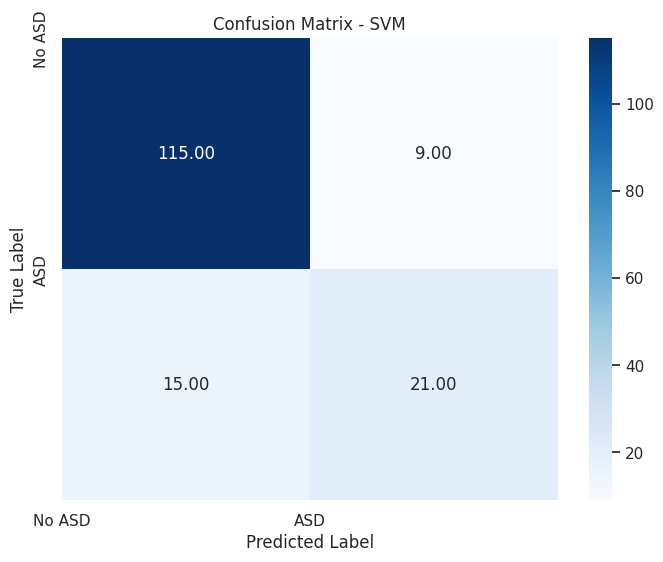

In [61]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='.2f')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=range(len(classes)), labels=classes)
    plt.yticks(ticks=range(len(classes)), labels=classes)
    plt.show()

# Plot confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(svm_cm, classes=["No ASD", "ASD"], normalize=False, title='Confusion Matrix - SVM')

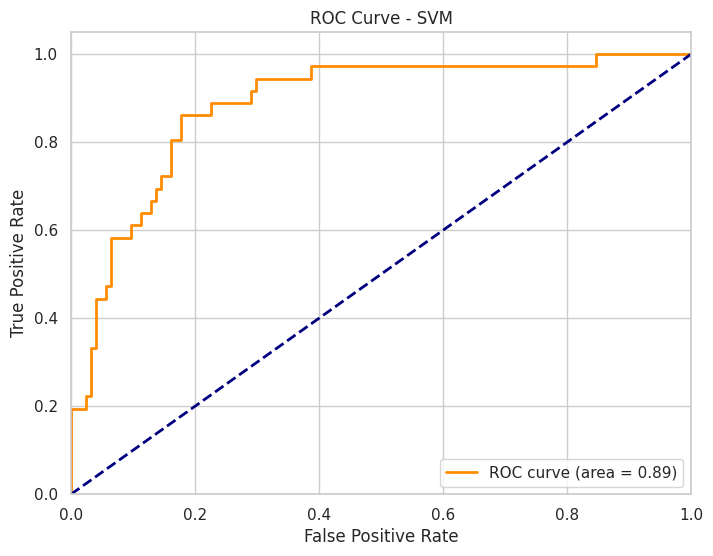

In [62]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# Calculate ROC curve for SVM
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_clf.decision_function(X_test))
svm_auc = roc_auc_score(y_test, svm_clf.decision_function(X_test))
plot_roc_curve(svm_fpr, svm_tpr, svm_auc, 'SVM')

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [63]:
# Calculate AUC score for SVM
svm_auc_score = roc_auc_score(y_test, svm_clf.decision_function(X_test))
print("AUC score for SVM:", svm_auc_score)


AUC score for SVM: 0.8850806451612904


F-beta Score:

In [64]:
# Define the beta value (e.g., 1 for F1 score, 0.5 for F0.5 score)
beta = 1  # You can adjust this value as needed

# Calculate F-beta score for SVM
svm_fbeta = fbeta_score(y_test, svm_pred, beta=beta)
print("F-beta score for SVM:", svm_fbeta)

F-beta score for SVM: 0.6363636363636365


---
<a id='4'></a>

## (4) K-Nearest-Neighbors (KNN)
Next, I explore the K-Nearest-Neighbors algorithm with a starting value of K=10. Recall that K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

# Train KNN classifier
knn_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       124
           1       0.45      0.14      0.21        36

    accuracy                           0.77       160
   macro avg       0.62      0.55      0.54       160
weighted avg       0.72      0.77      0.72       160



Confusion matrix, without normalization


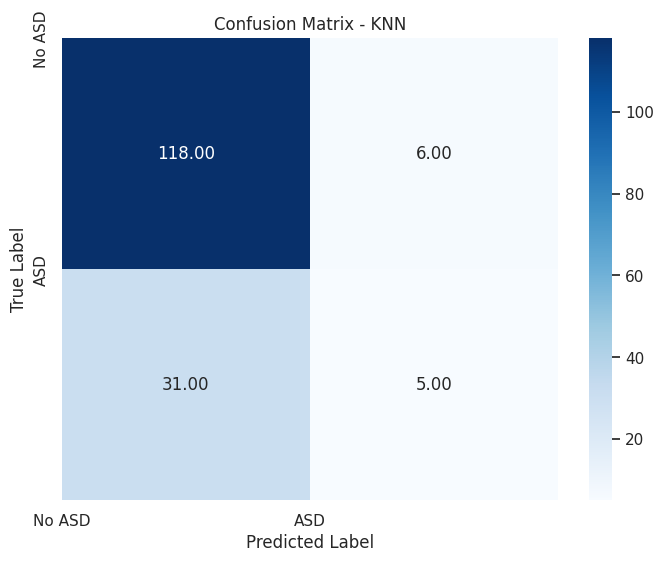

In [42]:
# Plot confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)
plot_confusion_matrix(knn_cm, classes=["No ASD", "ASD"], normalize=False, title='Confusion Matrix - KNN')

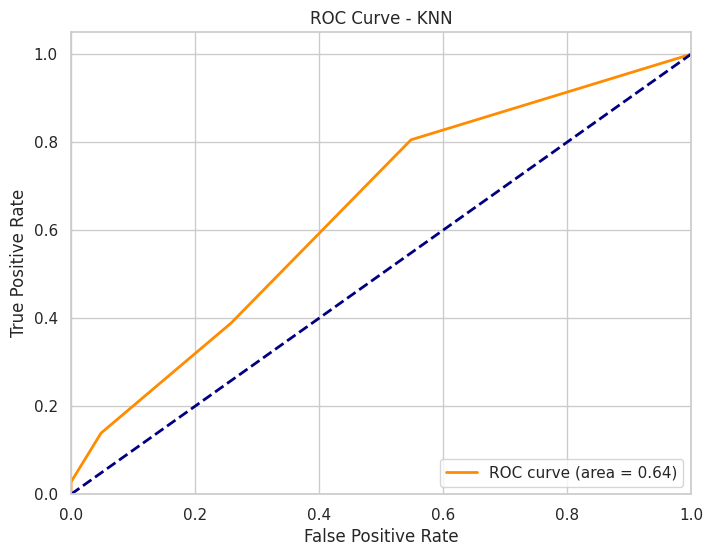

In [43]:
# Calculate ROC curve for KNN
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_clf.predict_proba(X_test)[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)
plot_roc_curve(knn_fpr, knn_tpr, knn_auc, 'KNN')

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [44]:
# Calculate AUC score for KNN
knn_auc_score = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
print("AUC score for KNN:", knn_auc_score)

AUC score for KNN: 0.6404569892473119


F-beta Score:

In [45]:
# Calculate F-beta score for KNN
knn_fbeta = fbeta_score(y_test, knn_pred, beta=beta)
print("F-beta score for KNN:", knn_fbeta)

F-beta score for KNN: 0.21276595744680854


---
<a id='5'></a>

## (5) Naive Bayes

Now I try naive_bayes.MultinomialNB classifier and ask how does its accuracy stack up.

In [46]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
nb_clf = GaussianNB()

# Train Naive Bayes classifier
nb_clf.fit(X_train, y_train)

# Predictions for Naive Bayes
nb_pred = nb_clf.predict(X_test)

# Generate classification report for Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.51      0.65       124
           1       0.33      0.83      0.47        36

    accuracy                           0.58       160
   macro avg       0.62      0.67      0.56       160
weighted avg       0.78      0.58      0.61       160



Confusion matrix, without normalization


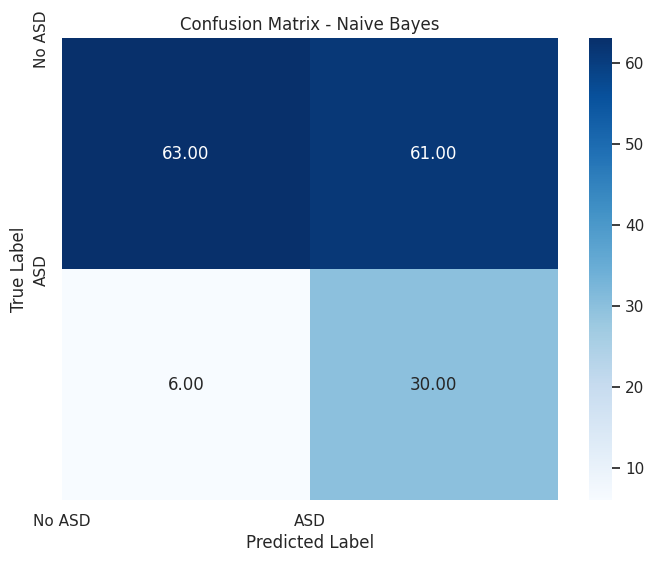

In [47]:
# Plot confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)
plot_confusion_matrix(nb_cm, classes=["No ASD", "ASD"], normalize=False, title='Confusion Matrix - Naive Bayes')

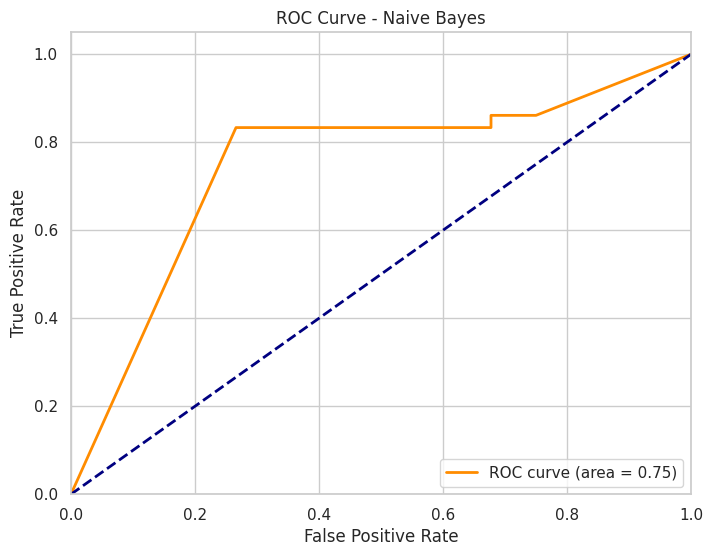

In [48]:
# Calculate ROC curve for Naive Bayes
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_clf.predict_proba(X_test)[:, 1])
nb_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve(nb_fpr, nb_tpr, nb_auc, 'Naive Bayes')

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [49]:
# Calculate AUC score for Naive Bayes
nb_auc_score = roc_auc_score(y_test, nb_clf.predict_proba(X_test)[:, 1])
print("AUC score for Naive Bayes:", nb_auc_score)

AUC score for Naive Bayes: 0.7487679211469533


F-beta Score:

In [50]:
# Calculate F-beta score for Naive Bayes
nb_fbeta = fbeta_score(y_test, nb_pred, beta=beta)
print("F-beta score for Naive Bayes:", nb_fbeta)

F-beta score for Naive Bayes: 0.47244094488188976


---
<a id='6'></a>

## (6) Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [51]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42)

# Train Logistic Regression classifier
lr_clf.fit(X_train, y_train)

# Predictions for Logistic Regression
lr_pred = lr_clf.predict(X_test)

# Generate classification report for Logistic Regression
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Classification Report:\n", lr_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       124
           1       0.69      0.56      0.62        36

    accuracy                           0.84       160
   macro avg       0.78      0.74      0.76       160
weighted avg       0.84      0.84      0.84       160



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix, without normalization


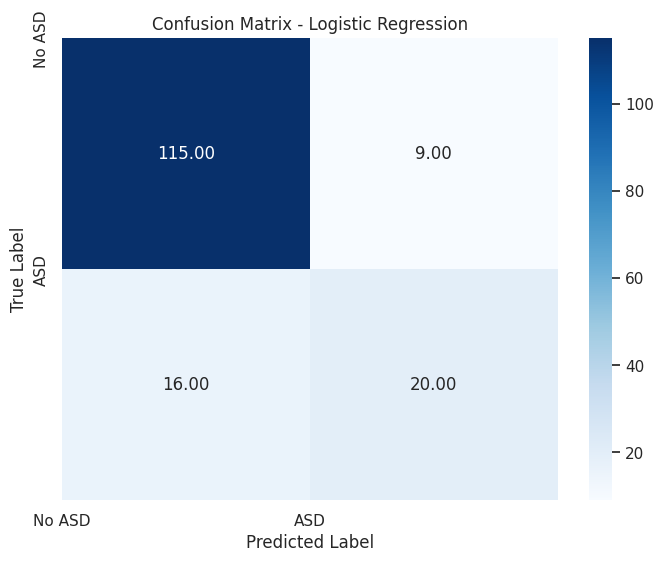

In [52]:
# Plot confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(lr_cm, classes=["No ASD", "ASD"], normalize=False, title='Confusion Matrix - Logistic Regression')

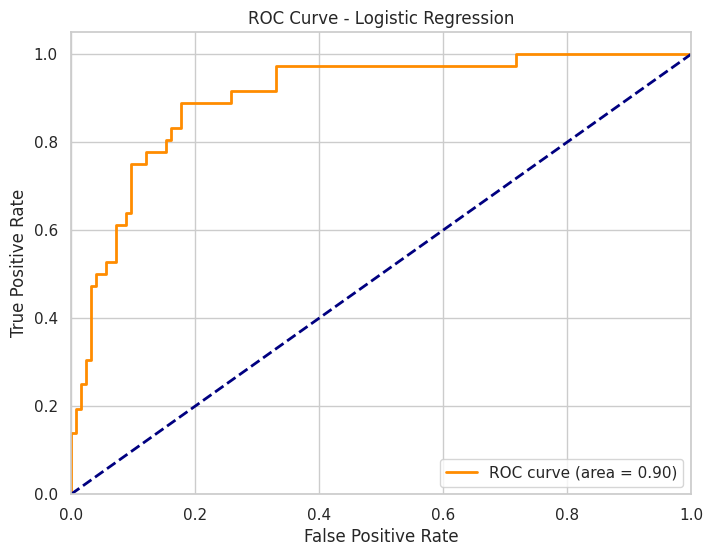

In [53]:
# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)
plot_roc_curve(lr_fpr, lr_tpr, lr_auc, 'Logistic Regression')

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [54]:
# Calculate AUC score for Logistic Regression
lr_auc_score = roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:, 1])
print("AUC score for Logistic Regression:", lr_auc_score)

AUC score for Logistic Regression: 0.9025537634408602


F-beta Score:

In [55]:
# Calculate F-beta score for Logistic Regression
lr_fbeta = fbeta_score(y_test, lr_pred, beta=beta)
print("F-beta score for Logistic Regression:", lr_fbeta)

F-beta score for Logistic Regression: 0.6153846153846154


---
<a id='step5'></a>

## Step 5: Building a MLP  model architecture
In this last part I build a model here using sequential model architecture best known as *Multi Layer Perceptron (MLP)*.

In [86]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [102]:
# Building the model architecture with one layer of length 4

model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 96))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 776       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [89]:
# Assuming you have your data loaded into X and y and preprocessed accordingly

# Check data types
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Convert data types if necessary
X_train = X_train.astype(np.float32)  # Convert to float32 if not already
y_train = y_train.astype(np.float32)  # Convert to float32 if not already

# Ensure shapes are compatible with model input
print("X_train shape after conversion:", X_train.shape)
print("y_train shape after conversion:", y_train.shape)

# Then proceed with model fitting
from keras.utils import to_categorical

# Assuming y_train contains categorical labels (e.g., 0s and 1s)
# Convert to binary labels
y_train_binary = to_categorical(y_train)

# Check the shape of y_train_binary
print("Shape of y_train_binary:", y_train_binary.shape)

X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>
X_train shape: (640, 96)
y_train shape: (640,)
X_train shape after conversion: (640, 96)
y_train shape after conversion: (640,)
Shape of y_train_binary: (640, 2)


In [109]:
import numpy as np

# Convert y_train to a NumPy array
y_train_array = np.array(y_train)

# Reshape y_train_array
y_train_binary = y_train_array.reshape(-1, 1)

# Fit the model
history =model.fit(X_train, y_train_binary, epochs=100)


Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.8938
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9016
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.9000
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.8922
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.8984
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2203 - accuracy: 0.8938
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.8984
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9000
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.8922
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2390 - accuracy: 0.9000
Epoch 11/

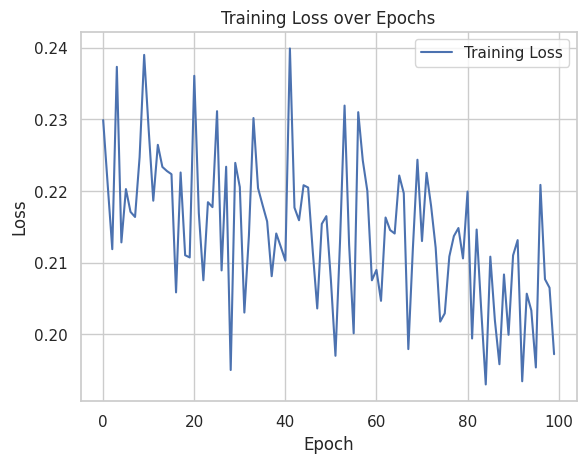

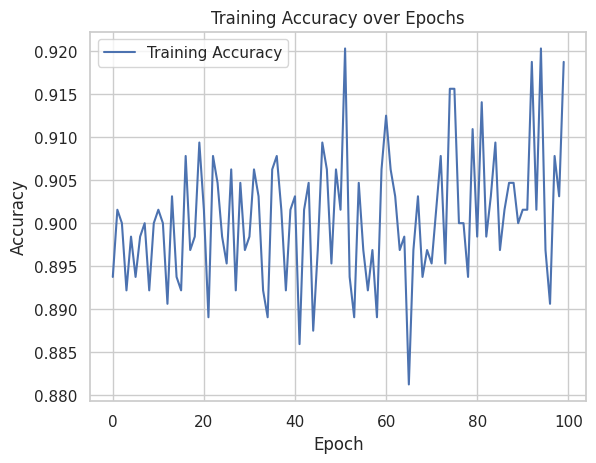

In [110]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()


### Evaluating the model
This will give you the accuracy of the model.

In [114]:
# Evaluating the model on the training and testing set
# Evaluate the model on the training data
loss, accuracy = model.evaluate(X_train, y_train_binary)
print("Multi Layer Perceptron Accuracy:", accuracy)

20/20 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 0.9266
Multi Layer Perceptron Accuracy: 0.926562488079071


5/5 [==============================] - 0s 4ms/step


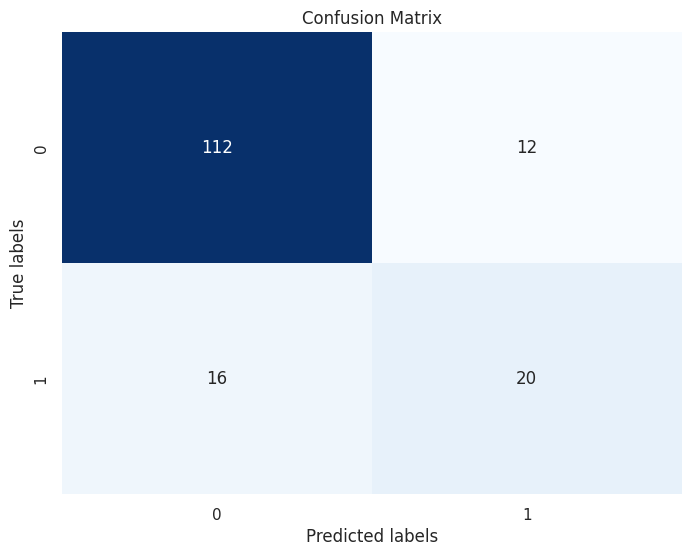

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get probability predictions for the test data
y_pred_prob = model.predict(X_test)

# Convert probability predictions to class labels based on a threshold
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


5/5 [==============================] - 0s 4ms/step


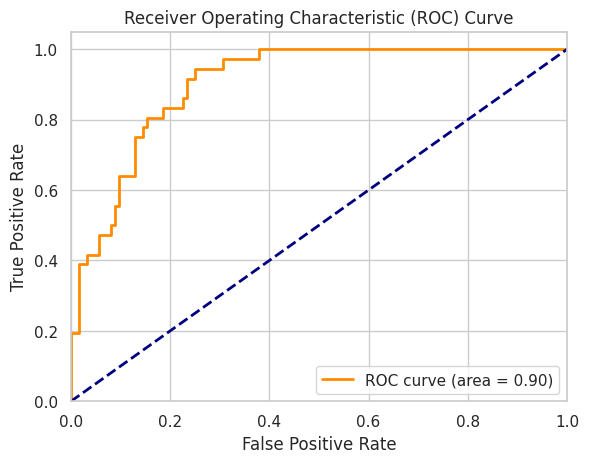

In [119]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the test data
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [120]:
from sklearn.metrics import roc_auc_score, fbeta_score

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

AUC: 0.9045698924731183


In [122]:
# Calculate F-beta score
beta = 2  # Specify the beta value for F-beta score
fbeta = fbeta_score(y_test, y_pred, beta=beta)
print("F-beta Score:".format(beta), fbeta)

F-beta Score: 0.5681818181818182


---
<a id='step6'></a>

## Step 6: Conclusion


After exploring my `ASD` dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used three different `metric` (such as `accuracy`, `AUC score` and `F-score`) to measure the performance of my models, and it seems like all of the `metric` indicated an almost perfect classification of the ASD cases. MLP is high performances.

I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that I can claim that this model is optimum. As this dataset is only publicly available from Decemeber 2017, I think not many works that deal with this dataset is available online. In that consideration, my models can serve as benchmark models for any machine learning researcher/practitioner who will be interested to explore this dataset further. With this fact in mind, I think this are very well developed model that can detect ASD in indivisuals with certain given attributes.